# Bike Rental in Seoul

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

This dataset used in this assignment was collected to help predict the demand for bike rental in Seoul at any given day and time.

<br>

The goal of this assignment is to preprocess the input variables into a format that makes them most useful for a linear regression model to predict the target variable.

<br>

To begin with, let's import the necessary libraries and read in the data:

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.dpi"] = 120

data = pd.read_csv("data/seoul_bike_data.csv") 

## Initial data inspection

Now that we have the dataset loaded in, let's inspect it with the methods `.info()` and `.head()`. 

Note that the variable `Rented Bike Count` is the target variable we are aiming to predict in this assignment.

In [35]:
#Column index, names, non-null count and type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8743 non-null   object 
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [36]:
#First5rows
data.head(40)



,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,30%-70%,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,30%-70%,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,30%-70%,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,30%-70%,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,30%-70%,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,30%-70%,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,30%-70%,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,30%-70%,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,30%-70%,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,<30%,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


As we can see, there are a lot of different variables which take very different ranges, very different units and accordingly have very different interpretations.

## Categorical vs. Continuous Variables

We must analyse each variable and decide how to preprocess it. Some variables are given in a discrete format, but it makes sense to make them continuous, and vice-versa. 

**1. Which variable columns are continuous quantities and which are categorical?**

Create two lists, `categorical` and `continuous` which contain the column indices for the categorical and continuous fields, respectively.

In [37]:
# Add your code below
#Date is categorical, so are range. Ordinal count as continuous
categorical = [0, 4, 11, 12, 13]
continuous = [1, 2, 3, 5, 6, 7, 8, 9, 10]


**2. Transform the Date variable to a continuous value**

The `Date` variable could be informative about a trend over time, and can be interpreted as a continuous variable for time. 

Using `.copy()`, create a copy of `data` called `data_date`. In `data_date`, transform the variable `Date` to a continuous variable in a new column called `DateTime`. Use a reference date of 01/01/2017, and unit **in days**.

Leave the `Date` column unchanged.

*Hint 1 : use the `pd.to_datetime()` function and subtract the values in the `Date` column from the reference date.*

In [38]:
# Add your code below
# data_date = data.copy()
# data_date["DateTime"] = ...
data_date = data.copy()
datetimes = pd.to_datetime(data["Date"])
# Convert reference to datetime, subtract from values in datetimes, convert sum into days
data_date["DateTime"] = (datetimes - pd.to_datetime('01/01/2017')).dt.days


**3. Create a one-hot representation of the season**

Categorical variables must be formatted to a one-hot representation to be ready for a linear regression model. Create $4$ new columns with the one-hot representation of the Seasons (`Spring`, `Summer`, `Autumn`, and `Winter`)

Before starting, create a copy of `data_date` called `data_season` using the `.copy()` method.

In [39]:
# Add your code below
# data_season = data_date.copy()
# data_season["Spring"] = ...
# data_season["Summer"] = ...

# sklearn.preprocessing.LabelEncoder allocates a number to each unique value in a series
# pandas.get_dummies and sklearn.preprocessing import OneHotEncoder creates new columns for each unique class, a value is scored 0 or 1 if contained in each

data_season = data_date.copy()
pd.get_dummies(data=data_season,columns=["Seasons"],prefix="",prefix_sep="").head()

# convert 1s or 2s ito trues n false

data_season = data_date.copy()
data_season["Spring"] = data_season["Seasons"] == "Spring"
data_season["Summer"] = data_season["Seasons"] == "Summer"
data_season["Autumn"] = data_season["Seasons"] == "Autumn"
data_season["Winter"] = data_season["Seasons"] == "Winter"

Once you have implemented the above, uncomment and run the cell below:

In [40]:
# data_season.sample(3)

**4. Transform the categorical `Humidity(%)` variable into a continuous quantity**

In some cases variables are given as discrete categories, but are representing ranges of a continuous values, for example the variable `Humidity(%)`.

Transform the variable `Humidity(%)` to a continuous quantity. Use the mean value of each category as its continuous value (e.g. if a category is 10%-20%, replace it with 15). Keep the same column name.

*Hint: You may want to use the `df.replace()` method.*

In [41]:
# Add your code below
# data_humidity = data_season.copy()
# data_humidity = ...


data_humidity = data_season.copy()
data_humidity = data_humidity.replace({
    "<30%": 15,
    "30%-70%": 50,
    ">70%": 85
})




Once you have implemented `data_humidity`, uncomment and run the following cell:

In [42]:
# data_humidity["Humidity(%)"].value_counts()

## Normalization

Let us inspect the distribution of the continuous variables.

Use the method `.describe()` to have some basic statistics.

In [43]:
#info = index, names, non-null count and type
#desc - stats, mean and range

data.describe()

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#### 5. Visualize the distribution of continuous variables

Inspect the histograms of the continuous variables in our data using the `hist()` method. Assign the plot to a variable called `continuous_fig`.

Note that since we have only been altering categorical variables so far, you should use the original `data` dataframe in this question.

*Hint: use the method `plt.tight_layout()` to create a better arrangement of subplots.*

<Figure size 720x480 with 0 Axes>

<Figure size 720x480 with 0 Axes>

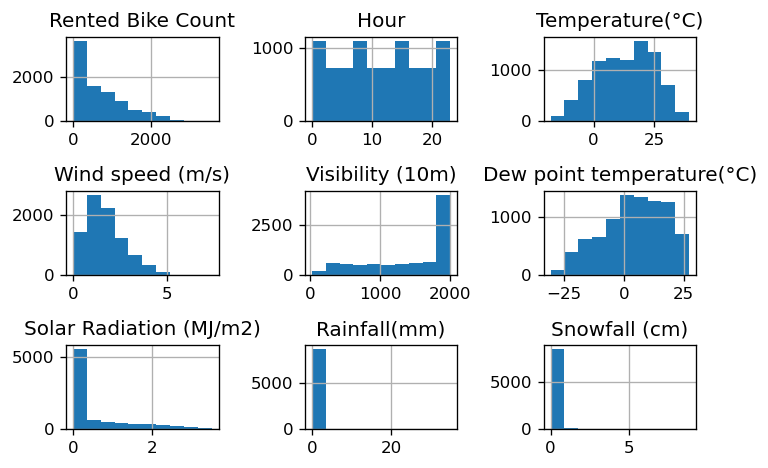

In [44]:
# We create a new figure to make other figures in the notebook don't get modified
plt.figure()

# Add your code below
# continuous_fig = ...
# We create a new figure to make other figures in the notebook don't get modified
plt.figure()

# select all rows and continuous columns,plot histograms tightly
continuous_fig = data.iloc[:, continuous].hist()
plt.tight_layout();

#continuous_fig = data.iloc[:, [2,3]].hist()
#plt.tight_layout();



**6. Convert continuous variables into categorical variables**

Note in the histograms above that these continuous variables have very distinct distribution profiles. For instance, some variables have a very high frequency for a specific value (e.g. zero Solar Radiation). 

It might be useful to have such distinctive values as additional categorical variables.

Create four additional binary variables for values that occur particularly often in the variables `Visibility`, `Solar Radiation`, `Rainfall` and `Snowfall`. For instance, create the binary variable `Zero Solar Radiation` that indicates when `Solar Radiation` is close to zero. Since the most common `Visibility` value is not zero, create a binary variable `Max Visibility` that indicates when `Visibility` is close to its maximum value.


First, however, create a copy of `data_humidity` using the `.copy()` method. Call your new dataframe `data_binary`.


*Hint: Use a comparison to the reference value (e.g. larger than) and a margin of 0.1.*

In [45]:
# Add your code below
# data_binary = data_humidity.copy()
# data_binary["Zero Solar Radiation"] = ...
# ...
data_binary = data_humidity.copy()
#if data_binary["Solar Radiation (MJ/m2)"] < 0.1, true
data_binary["Zero Solar Radiation"] = data_binary["Solar Radiation (MJ/m2)"] < 0.1
data_binary["Zero Snowfall"] = data_binary["Snowfall (cm)"] < 0.1
data_binary["Zero Rainfall"] = data_binary["Rainfall(mm)"] < 0.1
data_binary["Max Visibility"] = data_binary["Visibility (10m)"] > (data_binary["Visibility (10m)"].max() - 0.1)

Once you have created these new columns, uncomment and run the following cell:

In [48]:
data_binary["Zero Solar Radiation"].value_counts()
data_binary

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Functioning Day,DateTime,Spring,Summer,Autumn,Winter,Zero Solar Radiation,Zero Snowfall,Zero Rainfall,Max Visibility
0,01/12/2017,254,0,-5.2,50.0,2.2,2000,-17.6,0.0,0.0,...,Yes,11,False,False,False,True,True,True,True,True
1,01/12/2017,204,1,-5.5,50.0,0.8,2000,-17.6,0.0,0.0,...,Yes,11,False,False,False,True,True,True,True,True
2,01/12/2017,173,2,-6.0,50.0,1.0,2000,-17.7,0.0,0.0,...,Yes,11,False,False,False,True,True,True,True,True
3,01/12/2017,107,3,-6.2,50.0,0.9,2000,-17.6,0.0,0.0,...,Yes,11,False,False,False,True,True,True,True,True
4,01/12/2017,78,4,-6.0,50.0,2.3,2000,-18.6,0.0,0.0,...,Yes,11,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,50.0,2.6,1894,-10.3,0.0,0.0,...,Yes,698,False,False,True,False,True,True,True,False
8756,30/11/2018,764,20,3.4,50.0,2.3,2000,-9.9,0.0,0.0,...,Yes,698,False,False,True,False,True,True,True,True
8757,30/11/2018,694,21,2.6,50.0,0.3,1968,-9.9,0.0,0.0,...,Yes,698,False,False,True,False,True,True,True,False
8758,30/11/2018,712,22,2.1,50.0,1.0,1859,-9.8,0.0,0.0,...,Yes,698,False,False,True,False,True,True,True,False


**7. Normalise variables**

It is really important to ensure that input data are all scale to the same range. Without this, the model may produce some rather different results.

Normalising each input variable can help the model to train, provides an easier interpretation of the learned parameters, and offers better regularization.

Normalise each of the continuous variables in `data` to a *z-scored* data frame (such that each column has zero mean and unit variance). Use the transformation $$\frac{x - \mu}{\sigma}$$


Save the results in a different data frame `data_z` and visualize the new distributions using the `df.hist()` and `plt.tight_layout()` methods.

Assign the plot to a variable called `normalise_fig`.

*Hint: use the `mean()` and `std()` methods for the chosen columns.*

<Figure size 720x480 with 0 Axes>

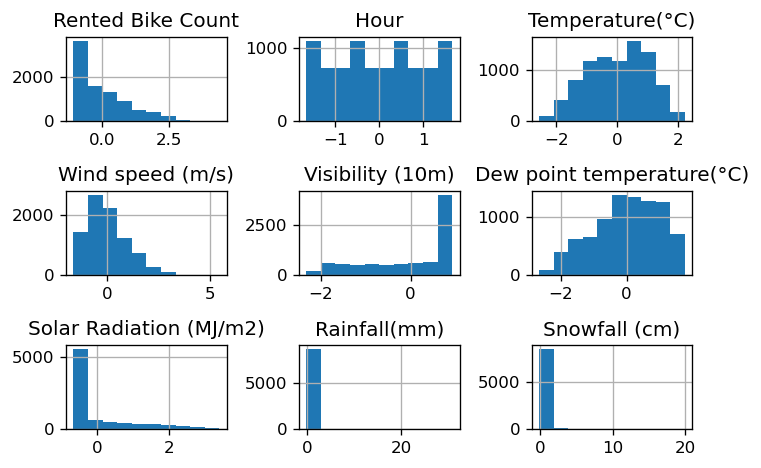

In [49]:
# We create a new figure to make other figures in the notebook don't get modified
plt.figure()


cols = data.iloc[:, continuous]

#Difference between each value and column mean over SD (the column z-scores)
data_z = (cols - cols.mean()) / cols.std()
normalise_fig = data_z.hist()

plt.tight_layout();

## Advanced discretization

#### 8. Discretizing a circular variable

Some continuous variables are not actually linear variables, and are not a natural input to a linear model. For example, Hours of the day is a circular variable, and the values 23 and 1 are actually close together in the day. 

Let us transform `Hour` to discrete categories.  Divide the variable to 5 categories: `Morning` (6-11), `Afternoon` (11-17), `Evening` (17-20), `Night` (20-0), `Early Morning` (0-6). 

First, however, create a copy of `data_binary` using the `.copy()` method. Call your new dataframe `data_time_categories`.


In [50]:
# Add your code below
# data_time_categories = data_binary.copy()
# data_time_categories["Morning"] = ...
# ...
# Add your code below
data_time_categories = data_binary.copy()
# Morning true if 6 <= data_time_categories["Hour"]) & (data_time_categories["Hour"] < 11
data_time_categories["Morning"] = (6 <= data_time_categories["Hour"]) & (data_time_categories["Hour"] < 11)
data_time_categories["Afternoon"] = (11 <= data_time_categories["Hour"]) & (data_time_categories["Hour"] < 17)
data_time_categories["Evening"] = (17 <= data_time_categories["Hour"]) & (data_time_categories["Hour"] < 20)
data_time_categories["Night"] = (20 <= data_time_categories["Hour"])
data_time_categories["Early Morning"] = (data_time_categories["Hour"] < 6)

Once you have implemented the above question, uncomment and run the following cell:

In [51]:
# data_time_categories["Morning"].value_counts()
data_time_categories["Morning"]

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Name: Morning, Length: 8760, dtype: bool

#### 9. Inspecting target variable dependency

The categories chosen above for `Hour` were rather arbitrary. One more advanced data preprocessing step is to inspect how a given input variable influences the target variable. 

Let's use the `seaborn` library to plot this dependency in detail how the target variable `Rented Bike Count` depends on `Hour`, with the `sns.violinplot()` method. It shows the distribution of bike rentals for each hour of the day. Assign the output of the plot to a variable called `bike_hour_dependency`. For input data, use the `data` dataframe.

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

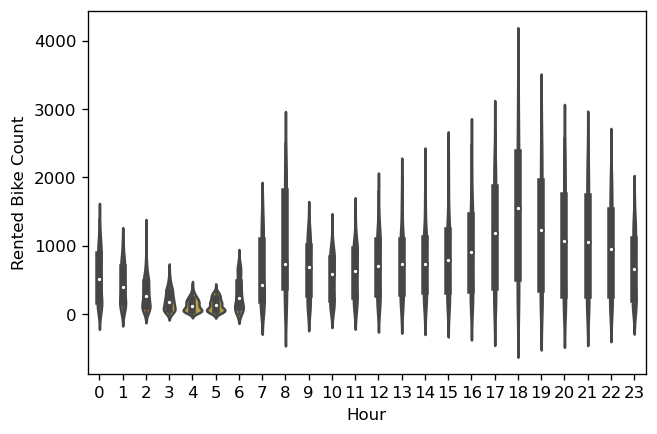

In [81]:
# We create a new figure to make other figures in the notebook don't get modified
plt.figure()

# Add your code below
# bike_hour_dependency = sns.violinplot(...);
import seaborn
bike_hour_dependency=seaborn.violinplot(data=data, x='Hour', y='Rented Bike Count')


We can see that there is complex relation between the variables. Note that as linear models are only sensitive to the mean correlation between variables (not the full distribution), we can focus on the mean values.

Calculate the mean `Rented Bike Count` for each hour of the day. Use the methods `groupby()` and `mean()` on the `data` dataframe, save the result to a variable called `mean_count`, and plot the result using `.plot()`

In [52]:
# Add your code below
# mean_count = ...

#Take all the values in rented bike count for each hour, and find their mean
mean_count = data.groupby("Hour")["Rented Bike Count"].mean()





,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Morning,Afternoon,Evening,Night,Early Morning,Hour Cat 1,Hour Cat 2,Hour Cat 3,Hour Cat 4,Hour Cat 5
3796,08/05/2018,155,4,15.4,50.0,1.6,2000,8.3,0.00,0.0,...,False,False,False,False,True,True,False,False,False,False
3062,07/04/2018,919,14,8.1,15.0,4.7,1914,-11.3,2.99,0.0,...,False,True,False,False,False,False,False,False,True,False
422,18/12/2017,116,14,0.5,85.0,0.9,364,-3.2,0.17,0.0,...,False,True,False,False,False,False,False,False,True,False
4793,18/06/2018,2040,17,29.5,50.0,3.7,1786,12.8,1.94,0.0,...,False,False,True,False,False,False,False,False,True,False
598,25/12/2017,176,22,-1.3,50.0,1.7,2000,-9.6,0.00,0.0,...,False,False,False,True,False,False,False,False,False,True
169,08/12/2017,230,1,-3.7,50.0,2.5,1902,-12.6,0.00,0.0,...,False,False,False,False,True,False,False,False,False,True
6462,27/08/2018,47,6,20.6,85.0,0.7,626,20.2,0.00,1.0,...,True,False,False,False,False,True,False,False,False,False
6316,21/08/2018,49,4,25.3,50.0,6.9,925,19.4,0.00,0.4,...,False,False,False,False,True,True,False,False,False,False
883,06/01/2018,207,19,-1.2,50.0,1.2,1663,-14.0,0.00,0.0,...,False,False,True,False,False,False,False,False,True,False
8617,25/11/2018,370,1,2.7,85.0,1.0,460,0.5,0.00,0.0,...,False,False,False,False,True,False,False,False,False,True


#### 10. Discretize nonlinear dependency

We see in the plot above a highly nonlinear effect of the variable `Hour` on the mean of the target `Rented Bike Count`. A linear model is not sensitive to this and it is a strong indication that discretization of the variable will help. As above, let's create categorical variables for different ranges of `Hour`, but now taking into account the dependency of the target variable.

We expect that a category will be more predictive if the target does not vary too much for samples of that category. For instance, the target value is similar for the hours 10, 11, 12 and 13, indicating that the range `10 <= Hour < 14` might have good predictive power for the target.

Divide `Hour` into five categories: 
 1. `3 <= Hour < 7`
 2. `7 <= Hour < 10`
 3. `10 <= Hour < 14`
 4. `14 <= Hour < 22`
 5. `22 <= Hour` or `Hour < 3`
 
First, create a copy of `data_time_categories` using the `.copy()` method. Call your new dataframe `final_data`.

In [62]:
# Add your code below
# final_data = data_time_categories.copy()
# final_data["Hour Cat 1"] = ... 
# final_data["Hour Cat 2"] = ... 
# ...
# Add your code below
final_data = data_time_categories.copy()
final_data["Hour Cat 1"] = (3 <= final_data["Hour"]) & (final_data["Hour"] < 7)
final_data["Hour Cat 2"] = (7 <= final_data["Hour"]) & (final_data["Hour"] < 10)
final_data["Hour Cat 3"] = (10 <= final_data["Hour"]) & (final_data["Hour"] < 14)
final_data["Hour Cat 4"] = (14 <= final_data["Hour"]) & (final_data["Hour"] < 22)
#Later than 22 or earlier than 3
final_data["Hour Cat 5"] = (22 <= final_data["Hour"]) | (final_data["Hour"] < 3)

final_data.sample(10)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Morning,Afternoon,Evening,Night,Early Morning,Hour Cat 1,Hour Cat 2,Hour Cat 3,Hour Cat 4,Hour Cat 5
5371,12/07/2018,2313,19,27.4,85.0,1.1,1899,23.2,0.27,0.0,...,False,False,True,False,False,False,False,False,True,False
3095,08/04/2018,182,23,2.9,85.0,0.9,829,0.6,0.00,0.0,...,False,False,False,True,False,False,False,False,False,True
1267,22/01/2018,167,19,-0.1,85.0,3.2,582,-1.8,0.00,0.0,...,False,False,True,False,False,False,False,False,True,False
3711,04/05/2018,1323,15,19.9,15.0,3.8,1898,-0.1,3.00,0.0,...,False,True,False,False,False,False,False,False,True,False
6538,30/08/2018,589,10,26.1,85.0,1.5,860,22.5,1.05,0.0,...,True,False,False,False,False,False,False,True,False,False
7873,25/10/2018,572,1,10.0,85.0,0.4,1669,6.3,0.00,0.0,...,False,False,False,False,True,False,False,False,False,True
114,05/12/2017,789,18,-2.6,50.0,0.0,2000,-14.4,0.00,0.0,...,False,False,True,False,False,False,False,False,True,False
550,23/12/2017,282,22,5.3,85.0,0.6,200,1.9,0.00,0.0,...,False,False,False,True,False,False,False,False,False,True
7553,11/10/2018,1685,17,13.2,50.0,3.6,2000,-1.5,0.55,0.0,...,False,False,True,False,False,False,False,False,True,False
7452,07/10/2018,1516,12,19.8,50.0,2.5,1837,7.8,2.30,0.0,...,False,True,False,False,False,False,False,True,False,False


Notice that in this case an hour-by-hour division may even be reasonable. But on the other hand, too many input variables can lead to overfitting problems.

## Evaluate predictions

#### 11. Implement linear regression model

Create a function with a single argument `cols`, which takes as input a `list` of column names to be used to train the model.

You will need to assign these columns of the `final_data` DataFrame to a variable (`X`), assignment the `Rented Bike Count` column to another variable (`Y`), and then use the `.fit()` method of the `LinearRegression` class to train your model.

Note that you might have to reshape some of these columns using the `.reshape()` function.

Finally, use the `mean_squared_error` to compute the error. Once computed, return the error as a `float`.

In [64]:
final_data.shape
final_data.loc[:, "Rented Bike Count"]

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

In [54]:

#Reshape into an unkown number of arrays, with one value in each array 
final_data.loc[:, "Rented Bike Count"].values.reshape(-1, 1).shape


(8760, 1)

In [57]:
final_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Morning,Afternoon,Evening,Night,Early Morning,Hour Cat 1,Hour Cat 2,Hour Cat 3,Hour Cat 4,Hour Cat 5
0,01/12/2017,254,0,-5.2,50.0,2.2,2000,-17.6,0.0,0.0,...,False,False,False,False,True,False,False,False,False,True
1,01/12/2017,204,1,-5.5,50.0,0.8,2000,-17.6,0.0,0.0,...,False,False,False,False,True,False,False,False,False,True
2,01/12/2017,173,2,-6.0,50.0,1.0,2000,-17.7,0.0,0.0,...,False,False,False,False,True,False,False,False,False,True
3,01/12/2017,107,3,-6.2,50.0,0.9,2000,-17.6,0.0,0.0,...,False,False,False,False,True,True,False,False,False,False
4,01/12/2017,78,4,-6.0,50.0,2.3,2000,-18.6,0.0,0.0,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,50.0,2.6,1894,-10.3,0.0,0.0,...,False,False,True,False,False,False,False,False,True,False
8756,30/11/2018,764,20,3.4,50.0,2.3,2000,-9.9,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
8757,30/11/2018,694,21,2.6,50.0,0.3,1968,-9.9,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
8758,30/11/2018,712,22,2.1,50.0,1.0,1859,-9.8,0.0,0.0,...,False,False,False,True,False,False,False,False,False,True


In [68]:
final_data.loc[:, "Temperature(°C)"].values

array([-5.2, -5.5, -6. , ...,  2.6,  2.1,  1.9])

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Add your code below

def prediction_error(cols):
    linear_model = LinearRegression()
    #pass array of values rather than DF column
    X = final_data.loc[:, cols].values
    Y = final_data.loc[:, "Rented Bike Count"].values.reshape(-1, 1)
    #Find best fit line of input column against bike count
    linear_model.fit(X, Y)
    #Predict input column using line
    Y_pred = linear_model.predict(X)
    error = mean_squared_error(Y_pred, Y)
    return error

Uncomment and run the code below to check your implementation.

In [70]:
prediction_error(["Temperature(°C)"])

295323.0413885623

#### 12. Compare performance of `Hour` representations

Compare the predictions of our linear model on the original `Hour` variable versus our hand-crafted categorical representations.

Assign the output of the `prediction_error()` function to two variables:
  1. `model1`: for just the `Hour` variable
  2. `model2`: for the categorical representations that we created.

Which model has the better performance? Note that with `mean_squared_error`, a lower error indicates a better fit to the data.

In [71]:
model1 = prediction_error(["Hour"])
model2 = prediction_error(["Hour Cat 1", "Hour Cat 2", "Hour Cat 3", "Hour Cat 4", "Hour Cat 5"])

print(model1, model2)

345961.18287118233 325922.64821677015


#### 13. Compare performance of complete representations

Compare the prediction error based on all the original variables against the prediction error for all variables after preprocessing. Include only variables that are acceptable to the linear model. 

In [76]:
continuous

[1, 2, 3, 5, 6, 7, 8, 9, 10]

In [72]:
#extract the continuous columns by finding the index of all columns. If the index is in the index original list of continous columns we defined above, print their names  
for idx, val in enumerate(data.columns):
    if idx in continuous:
        print(val)

Rented Bike Count
Hour
Temperature(°C)
Wind speed (m/s)
Visibility (10m)
Dew point temperature(°C)
Solar Radiation (MJ/m2)
Rainfall(mm)
Snowfall (cm)


In [74]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [77]:
final_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'DateTime', 'Spring', 'Summer', 'Autumn',
       'Winter', 'Zero Solar Radiation', 'Zero Snowfall', 'Zero Rainfall',
       'Max Visibility', 'Morning', 'Afternoon', 'Evening', 'Night',
       'Early Morning', 'Hour Cat 1', 'Hour Cat 2', 'Hour Cat 3', 'Hour Cat 4',
       'Hour Cat 5'],
      dtype='object')

In [78]:
# Add your code below
full_model_original = prediction_error([
    "Hour", "Temperature(°C)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)",
    "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)"
])

full_model_updated = prediction_error([
    "Temperature(°C)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)",
    "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)", 'DateTime', 'Autumn', 
    'Spring', 'Summer', 'Winter', 'Zero Solar Radiation', 'Max Visibility', 'Zero Rainfall', 
    'Zero Snowfall', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Hour Cat 1', 
    'Hour Cat 2', 'Hour Cat 3', 'Hour Cat 4', 'Hour Cat 5' 
])


print(full_model_original)
print(full_model_updated)

221809.5906029843
171312.50407985126
